# Linear and Logistic Regression

## Statistical models

In the first part of this course, we focused on what I called **exploratory data analyses**. In particular, we looked at tools that allow us to load data in R, clean them, summarize them using some basic statistics (such as mean and variance), transform them (such as by using the logaritmic function) and plot them. I also mentioned how these tools are crucial because they allow us to prepare the data for "further analyses".

But what are these "further analyses"? Further analyses typically include some form of **statistical hypothesis testing** (or confirmatory data analysis).

For testing, we need:

- an **hypothesis** about the relationship between random variables at the population level.

- a **statistical model** that formalizes such hypothesis, given certain assumptions.

The data we collect will be a sample from the population we want to draw inferences on. With the statistical model we also formalize the sampling error, and the limits within which these models are valid (its assumptions).

The hypothesis is what we come up with *before* collecting the data. Before collecting the data, we should also already know which statistical model to use and how many trials/participants we need to test such hypothesis in order to minimize [type 1 and type 2 errors](https://en.wikipedia.org/wiki/Type_I_and_type_II_errors).

**Note on null hypothesis testing in frequentist statistics (unfortunately this course will be only limited to that ;) )**

Null hypothesis testing is a formal approach to deciding between two interpretations of a statistical relationship in a sample. One interpretation is called the **null hypothesis (H0)**. This is the idea that there is no relationship in the population and that the relationship in the sample reflects only sampling error. Informally, the null hypothesis is that the sample relationship “occurred by chance.” The other interpretation is called the **alternative hypothesis (H1)**. This is the idea that there is a relationship in the population and that the relationship in the sample reflects this relationship in the population.

Again, every statistical relationship in a sample can be interpreted in either of these two ways: It might have occurred by chance, or it might reflect a relationship in the population. So researchers need a way to decide between them. Although there are many specific null hypothesis testing techniques, they are all based on the same general logic. The steps are as follows:

- Assume for the moment that the null hypothesis is true. There is no relationship between the variables in the population.
- Determine how likely the sample relationship would be if the null hypothesis were true.
- If the sample relationship would be extremely unlikely, then reject the null hypothesis in favour of the alternative hypothesis. If it would not be extremely unlikely, then retain the null hypothesis.

## Linear regression model

In statistics, linear regression is a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). The case of one explanatory variable is called simple linear regression. For more than one explanatory variable, the process is called multiple linear regression. This term is distinct from multivariate linear regression, where multiple correlated dependent variables are predicted, rather than a single scalar variable (we will not cover this in our course).

In linear regression, the relationships are modeled using linear predictor functions whose unknown model parameters are estimated from the data. Such models are called linear models.

We already saw how to plot the relationship between 2 continuous variables (scatterplot) and how to add a regression line.
Now we are going to see how to test such relationship.

#### Assumptions of regression
Linear regression models rely on several assumptions:
- Normality: they assume that the residuals are normally distributed. It’s actually okay if the predictors X and the outcome Y are non-normal, so long as the residuals are.
- Linearity: they assume that the relationship between X and Y is linear.
- Homogeneity of variance: they assume that the standard deviation is the same for every single residual.

Other things to check:
- Uncorrelated predictors (only relevant for multiple regression, which we'll se next week): The idea here is that, is a multiple regression model, you don’t want your predictors to be too strongly correlated with each other, to be able to reliably interpret and estimate the parameters.
- Residuals are independent of each other: This is more due to the specific design: is there something else that can explain the residuals? E.g., data collected across different days, groups of subjects, etc.
- No “bad” outliers: In case of extreme outliers, the parameters estimates will be biased and not representative of the rest of the data.

Open RStudio.

Open a new R script in R and **save it as** `wpa_8_LastFirst.R` (where Last and First is your last and first name). 

Careful about: capitalizing, last and first name order, and using `_` instead of `-`.

At the top of your script, write the following (**with appropriate changes**):

In [1]:
# Assignment: WPA 8
# Name: Laura Fontanesi
# Date: 27 April 2021

## 1. Model fitting

Today, we will se how to fit a simple linear regression model using `lm()`.

Main arguments:
- `formula`. A formula that specifies the regression model. For simple linear regression models, in which you have a single predictor variable as well as an intercept term, this formula is of the form outcome ~ predictor.
- `data`. The data frame containing the variables.

y = a + bx -> y ~ x

In [2]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.4
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



For illustrative purposes, we are going to load the quakes dataset:

In [3]:
glimpse(quakes)

Rows: 1,000
Columns: 5
$ lat      <dbl> -20.42, -20.62, -26.00, -17.97, -20.42, -19.68, -11.70, -28.1…
$ long     <dbl> 181.62, 181.03, 184.10, 181.66, 181.96, 184.31, 166.10, 181.9…
$ depth    <int> 562, 650, 42, 626, 649, 195, 82, 194, 211, 622, 583, 249, 554…
$ mag      <dbl> 4.8, 4.2, 5.4, 4.1, 4.0, 4.0, 4.8, 4.4, 4.7, 4.3, 4.4, 4.6, 4…
$ stations <int> 41, 15, 43, 19, 11, 12, 43, 15, 35, 19, 13, 16, 19, 10, 94, 1…


`geom_smooth()` using formula 'y ~ x'



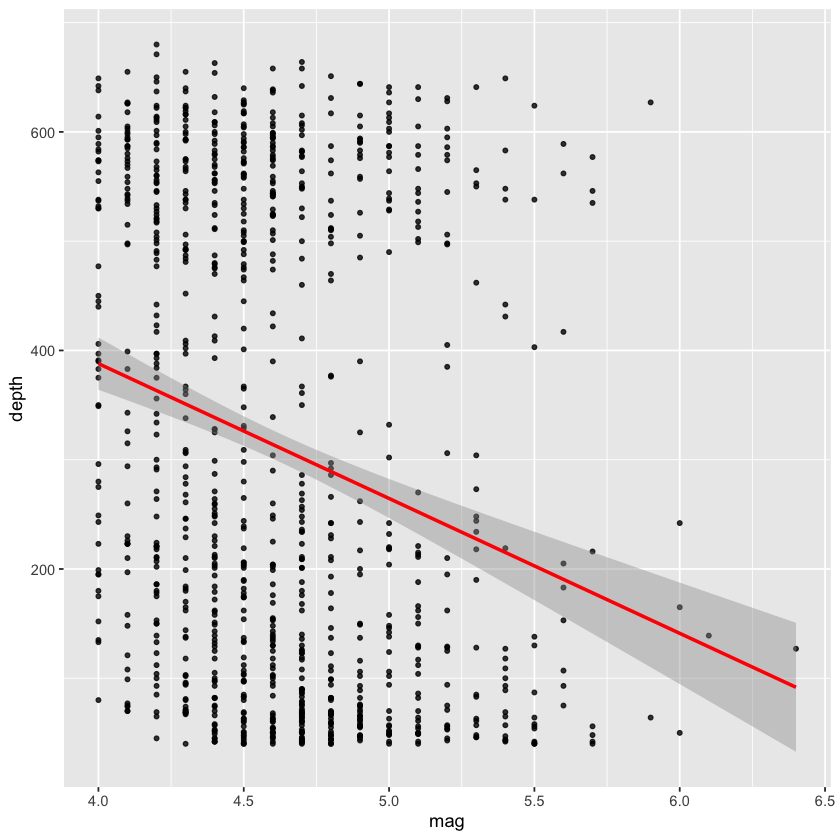

In [4]:
ggplot(data = quakes, mapping = aes(x = mag, y = depth)) + 
    geom_point(alpha = 0.8, size= 1) +
    geom_smooth(method = lm, color='red')

In [5]:
# Fit linear regression model:
model_fit = lm(depth ~ mag, data = quakes)

In [6]:
# Get a summary of the model fit:
summary(model_fit)


Call:
lm(formula = depth ~ mag, data = quakes)

Residuals:
    Min      1Q  Median      3Q     Max 
-318.26 -191.44  -57.56  213.42  473.56 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   881.63      76.44  11.533  < 2e-16 ***
mag          -123.42      16.48  -7.488 1.54e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 209.8 on 998 degrees of freedom
Multiple R-squared:  0.05319,	Adjusted R-squared:  0.05225 
F-statistic: 56.07 on 1 and 998 DF,  p-value: 1.535e-13


In the summary above, we find a lot of information:

- descriptive statistics for the model residuals (distance of each dot from the estimated regression line): we assumed that these residuals were normally distributed, with mean 0. So it’s worth quickly checking to see if the median is close to zero, and to see if the first quartile is about the same size as the third quartile. If they look badly off, there’s a good chance that the assumptions of regression are violated.

- model parameters: the intercept and coefficient of the estimated regression line (compare with plot above: makes sense?)

- statistical test for the model parameters (both intercept and coefficient): how likely is it that they are equal to 0? In general, values of the regression coefficient represent the change in the outcome resulting from a unit change in the predictor and that if a predictor is having a significant impact on our ability to predict the outcome then this should be different from 0. The t-test tells us whether the b-value is different from O. R provides the exact probability that the observed value of t would occur if the value of b in the population were O. If this observed significance is less than .05, then scientists agree that the result reflects a genuine effect.

- statistical test for the model as a whole: the value of R2 and adjusted R2. When there is only one predictor, R2 represents the square of the simple correlation between predictor and predicted variable. You can get the Pearson correlation coefficient by calculating the sqrt(R2). The value of R2 also tells us the percentage of varioation in predicted variable that can be acocunted by the predictor. Note that the adjusted R2 is particularly important when there are several predictors.

- results of an analysis of variance: is the regression better than just the intercept model?

In [7]:
# Get confidence intervals for the parameter coefficients:
confint(object = model_fit, level = .95)

,2.5 %,97.5 %
(Intercept),731.6149,1031.63519
mag,-155.7653,-91.07654


What was missing above were the confidence intervals for the regression coefficients. These can be easily obtained with the `confint` function.

Like any population parameter, the regression coefficients cannot be estimated with complete precision from a sample of data; that’s part of why we need hypothesis tests. Given this, it’s quite useful to be able to report confidence intervals that capture our uncertainty about the true values of the coefficients. This is especially useful when the research question focuses heavily on an attempt to find out how strongly variable X is related to variable Y , since in those situations the interest is primarily in the regression weight (in this case "mag").

## 2. Model checking

### Residuals

The first and simplest kind of residuals that we care about are **ordinary residuals**. The ordinary residual is just the difference between the estimated (regression line) and the observed values.

In a lot of contexts, especially where you’re only interested in the pattern of the residuals and not their actual values, it’s convenient to estimate the **standardised residuals**, which are normalised in such a way as to have standard deviation 1.

Finally, the third kind of residuals are **Studentised residuals**.

### Anomalous data

The first kind of unusual observation is an **outlier**. The definition of an outlier is an observation that is very different from what the regression model predicts. Outliers are interesting: a big outlier might correspond to junk data – e.g., the variables might have been entered incorrectly, or some other defect may be detectable. Note that you shouldn’t throw an observation away just because it’s an outlier. But the fact that it’s an outlier is often a cue to look more closely at that case, and try to find out why it’s so different.



In [8]:
# Obtain ordinary residuals:
res = residuals(object = model_fit)

# Obtain standardised residuals:
res_sta = rstandard(model = model_fit)

# Obtain standardised residuals:
res_stu = rstudent(model = model_fit)

# Obtain model's predictions:
pred = model_fit$fitted.values

model_checks = data.frame(pred = pred, res = res, res_sta = res_sta, res_stu = res_stu)
model_checks = as_tibble(model_checks)
head(model_checks)

pred,res,res_sta,res_stu
<dbl>,<dbl>,<dbl>,<dbl>
289.2046,272.7954,1.3008605,1.3013123
363.2572,286.7428,1.3679814,1.3685796
215.1520,-173.1520,-0.8271700,-0.8270390
375.5992,250.4008,1.1949496,1.1952061
387.9413,261.0587,1.2462506,1.2465964
387.9413,-192.9413,-0.9210698,-0.9209998


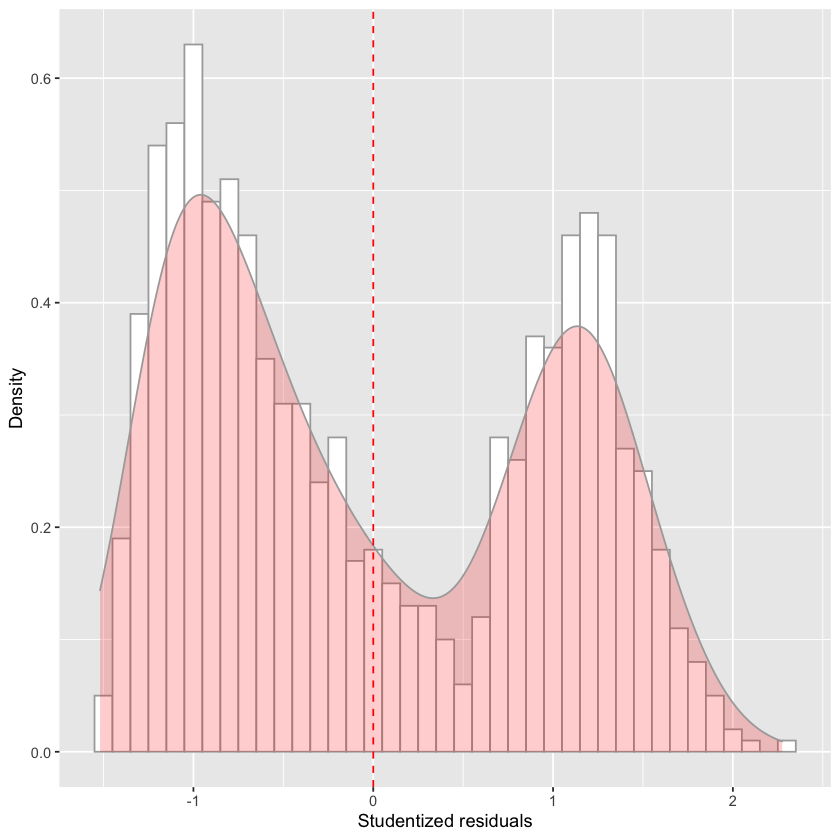

In [9]:
ggplot(data = model_checks, mapping = aes(x = res_stu)) + 
    geom_histogram(aes(y=..density..), binwidth=.1, colour="darkgrey", fill="white") + # Note: add aes(y=..density..) to have density instead of frequencies
    labs(x = 'Studentized residuals', y='Density') + 
    geom_density(alpha=.2, fill="red", colour="darkgrey")  + # Overlay with transparent density plot
    geom_vline(aes(xintercept=mean(res_stu)), color="red", linetype="dashed", size=.5) # Add mean residuals

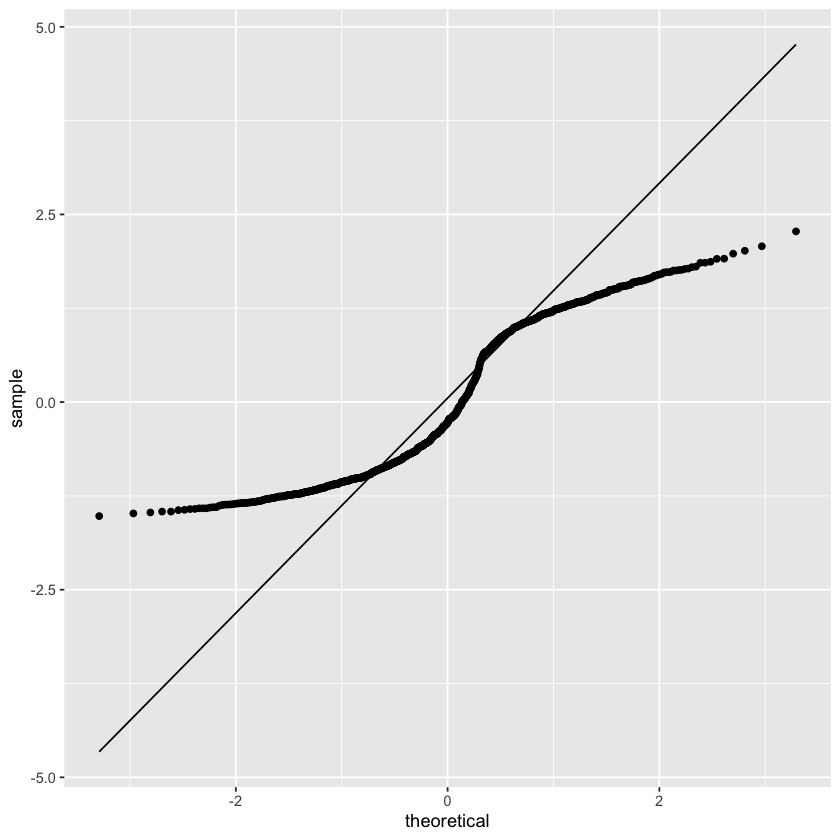

In [10]:
ggplot(model_checks, mapping = aes(sample = res_stu)) +
    stat_qq() + 
    stat_qq_line()

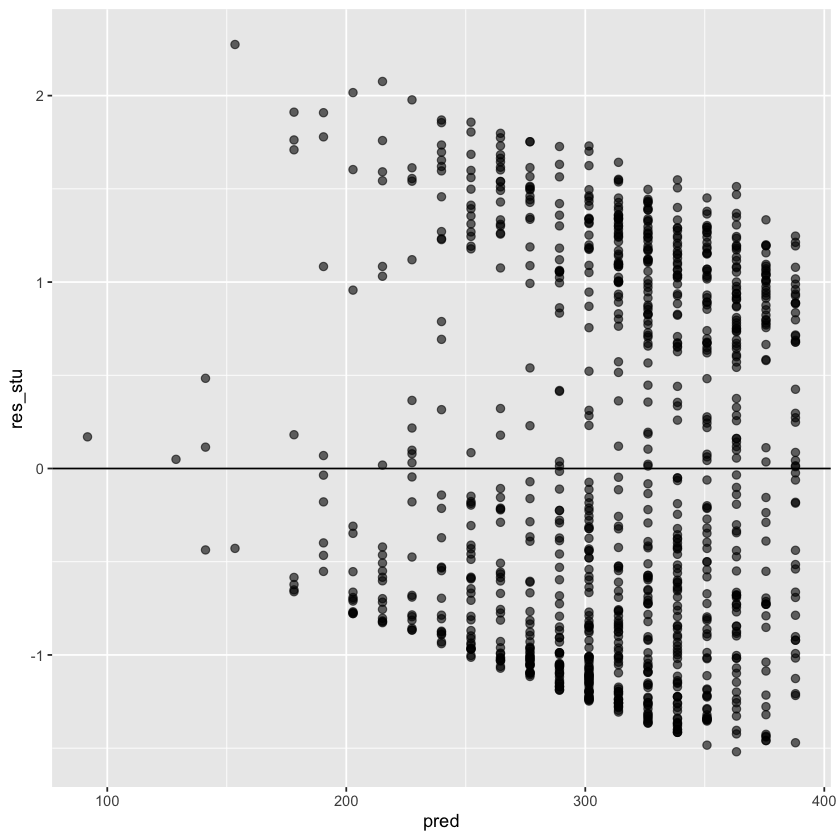

In [11]:
ggplot(data = model_checks, mapping = aes(x = pred, y = res_stu)) + 
    geom_point(alpha = 0.6, size= 2) + 
    geom_hline(yintercept=0)

## 3. Logistic regression

In [12]:
install.packages('ISLR')


The downloaded binary packages are in
	/var/folders/zy/hm8tbx3j7jn6skbfk75x0ll00000gp/T//RtmprnRyzF/downloaded_packages


In [13]:
library(ISLR)

In [14]:
glimpse(Smarket)

Rows: 1,250
Columns: 9
$ Year      <dbl> 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, …
$ Lag1      <dbl> 0.381, 0.959, 1.032, -0.623, 0.614, 0.213, 1.392, -0.403, 0.…
$ Lag2      <dbl> -0.192, 0.381, 0.959, 1.032, -0.623, 0.614, 0.213, 1.392, -0…
$ Lag3      <dbl> -2.624, -0.192, 0.381, 0.959, 1.032, -0.623, 0.614, 0.213, 1…
$ Lag4      <dbl> -1.055, -2.624, -0.192, 0.381, 0.959, 1.032, -0.623, 0.614, …
$ Lag5      <dbl> 5.010, -1.055, -2.624, -0.192, 0.381, 0.959, 1.032, -0.623, …
$ Volume    <dbl> 1.1913, 1.2965, 1.4112, 1.2760, 1.2057, 1.3491, 1.4450, 1.40…
$ Today     <dbl> 0.959, 1.032, -0.623, 0.614, 0.213, 1.392, -0.403, 0.027, 1.…
$ Direction <fct> Up, Up, Down, Up, Up, Up, Down, Up, Up, Up, Down, Down, Up, …


There's a number of lags, volume, today's price, and direction. We will use Direction as a response vairable, as that shows whether the market went up or down since the previous day.

In [22]:
# Fit linear regression model:
model_fit = glm(Direction ~ Volume, data = Smarket, family = binomial)

In [23]:
# Get a summary of the model fit:
summary(model_fit)


Call:
glm(formula = Direction ~ Volume, family = binomial, data = Smarket)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.302  -1.204   1.101   1.149   1.207  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)
(Intercept)  -0.1151     0.2394  -0.481    0.631
Volume        0.1277     0.1574   0.811    0.417

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1731.2  on 1249  degrees of freedom
Residual deviance: 1730.5  on 1248  degrees of freedom
AIC: 1734.5

Number of Fisher Scoring iterations: 3


## 3. Now it's your turn

## Student Performance

In this WPA, you will analyze data from a study on student performance in two classes: math and Portugese. These data come from the UCI Machine Learning database at http://archive.ics.uci.edu/ml/datasets/Student+Performance#

The data were collected for this paper:  
P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7. 

Here is the data description (taken directly from the original website):

*This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see paper source for more details).*

#### Datafile description

1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira) 

2 sex - student's sex (binary: 'F' - female or 'M' - male) 

3 age - student's age (numeric: from 15 to 22) 

4 address - student's home address type (binary: 'U' - urban or 'R' - rural) 

5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3) 

6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart) 

7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 ???????? 5th to 9th grade, 3 ???????? secondary education or 4 ???????? higher education) 

8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education) 

9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') 

10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') 

11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other') 

12 guardian - student's guardian (nominal: 'mother', 'father' or 'other') 

13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour) 

14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours) 

15 failures - number of past class failures (numeric: n if 1<=n<3, else 4) 

16 schoolsup - extra educational support (binary: yes or no) 

17 famsup - family educational support (binary: yes or no) 

18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no) 

19 activities - extra-curricular activities (binary: yes or no) 

20 nursery - attended nursery school (binary: yes or no) 

21 higher - wants to take higher education (binary: yes or no) 

22 internet - Internet access at home (binary: yes or no) 

23 romantic - with a romantic relationship (binary: yes or no) 

24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent) 

25 freetime - free time after school (numeric: from 1 - very low to 5 - very high) 

26 goout - going out with friends (numeric: from 1 - very low to 5 - very high) 

27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high) 

28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high) 

29 health - current health status (numeric: from 1 - very bad to 5 - very good) 

30 absences - number of school absences (numeric: from 0 to 93) 

31 G1 - first period grade (numeric: from 0 to 20) 

31 G2 - second period grade (numeric: from 0 to 20) 

32 G3 - final grade (numeric: from 0 to 20, output target)

**Task A**

1. Download the data from the website (by clicking on `Data Folder`, and unzipping the downloaded `student` folder on your computer). We are going to use one of the files contained in the `student` folder: `student-mat.csv`. Load it in R as `student_math`. Inspect the dataset first.

2. Create a regression object called `model_fit_math_1` predicting first period grade (G1) based on age. How do you interpret the relationship between age and first period grade? Respond in terms of both model parameters fit and overall model fit. Were the model assumption violated? Respond using the plots we have seen in class. Finally, make a scatterplot with the regression line to illustrate such relationship as we have seen in previous assignments.

3. Create a regression object called `model_fit_math_2` predicting first period grade (G1) based on absences. How do you interpret the relationship between absences and G1? Respond in terms of both model parameters fit and overall model fit. Were the model assumption violated? Respond using the plots we have seen in class. Finally, make a scatterplot with the regression line to illustrate such relationship as we have seen in previous assignments.

4. Create a regression object called `model_fit_math_3` predicting first period grade (G1) based on school support. How do you interpret the relationship between school support and G1? Respond in terms of both model parameters fit and overall model fit. Were the model assumption violated? Respond using the plots we have seen in class. Finally, make a scatterplot with the regression line to illustrate such relationship as we have seen in previous assignments. 

5. Given that school support is a nominal variable with 2 levels, how can you tell from the output which direction the effect is? How does this relate to the way the dataset has stored the levels of the school support factor?

5. From the regression, what would be your best guess for the first period grade for a student with no school support? What about for a student with school support?

## Submit your assignment

Save and email your script to me at [laura.fontanesi@unibas.ch](mailto:laura.fontanesi@unibas.ch) by the end of **Friday**.